In [38]:
import random
from collections import Counter
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [56]:
# Number of agents
N = 400

# Cost
c = 0.1

# Benefit
b = 1

minimum_strategy = -5
maximum_strategy = 6

minimum_image_score = -5
maximum_image_score = 5

In [57]:
class Agent:
    def __init__(self, strategy):
        self.image_score = 0
        self.payoff = 0
        self.strategy = strategy

    def increase_image_score(self):
        temp_score = self.image_score + 1
        if temp_score > maximum_image_score:
            self.image_score = maximum_image_score
        else:
            self.image_score = temp_score

    def decrease_image_score(self):
        temp_score = self.image_score - 1
        if temp_score < minimum_image_score:
            self.image_score = minimum_image_score
        else:
            self.image_score = temp_score

In [53]:
def play_round(m=60, iterations=150):
    agents = []
    coalitions = []
    network = networkx.barabasi_albert_graph(N, 3)

    final_strategies = []
    number_of_coalitions_per_round = []

    for i in range(N):
        agent = Agent(random.randint(minimum_strategy, maximum_strategy))
        agents.append(agent)
        network.nodes[i]['agent'] = agent

    for iteration in range(iterations):

        for pair_number in range(m):
            a_i, a_j = find_players(agents)
            change_payoff_score(a_i, a_j, network, coalitions)

        for a_i in agents:
            # Change Strategy
            change_strategy(a_i, network)

        for a_i in agents:
            # Reset Image Score and Payoff
            reset_image_score_and_payoff(a_i)


    for i in range(N):
        final_strategies.append(network.nodes[i]['agent'].strategy)
    #print(Counter(final_strategies))
    return final_strategies

In [54]:
def change_strategy(a_i, network):
    neighbors_payoffs = []
    neighbors_strategies = []

    for neighbor in get_neighbors(a_i, network):
        neighbors_payoffs.append(network.nodes[neighbor]['agent'].payoff)
        neighbors_strategies.append(network.nodes[neighbor]['agent'].strategy)

    max_payoff = max(neighbors_payoffs)

    for i in range(len(neighbors_payoffs)):
        if neighbors_payoffs[i] == max_payoff:
            a_i.strategy = neighbors_strategies[i]
            break


def reset_image_score_and_payoff(a_i):
    a_i.image_score = 0
    a_i.payoff = 0


def change_payoff_score(a_i, a_j, network, coalitions):
    a_j_score = 0
    if is_neighbor(a_i, a_j, network):
        a_j_score = a_j.image_score

    if a_i.strategy <= a_j_score:
        a_i.payoff -= c
        a_j.payoff += b
        a_i.image_score += 1
        a_i.increase_image_score()
    else:
        a_i.decrease_image_score()


def get_neighbors(a_i, network):
    for node, node_data in network.nodes(data=True):
        if network.nodes[node]['agent'] == a_i:
            return network.neighbors(node)


def is_neighbor(a_i, a_j, network):
    for node, node_data in network.nodes(data=True):
        if network.nodes[node]['agent'] == a_i:
            for neighbor in network.neighbors(node):
                if network.nodes[neighbor]['agent'] == a_j:
                    return True
            break
    return False


def find_players(agents):
    a_i, a_j = random.sample(agents, 2)
    while a_i == a_j:
        a_i, a_j = random.sample(agents, 2)
    return a_i, a_j

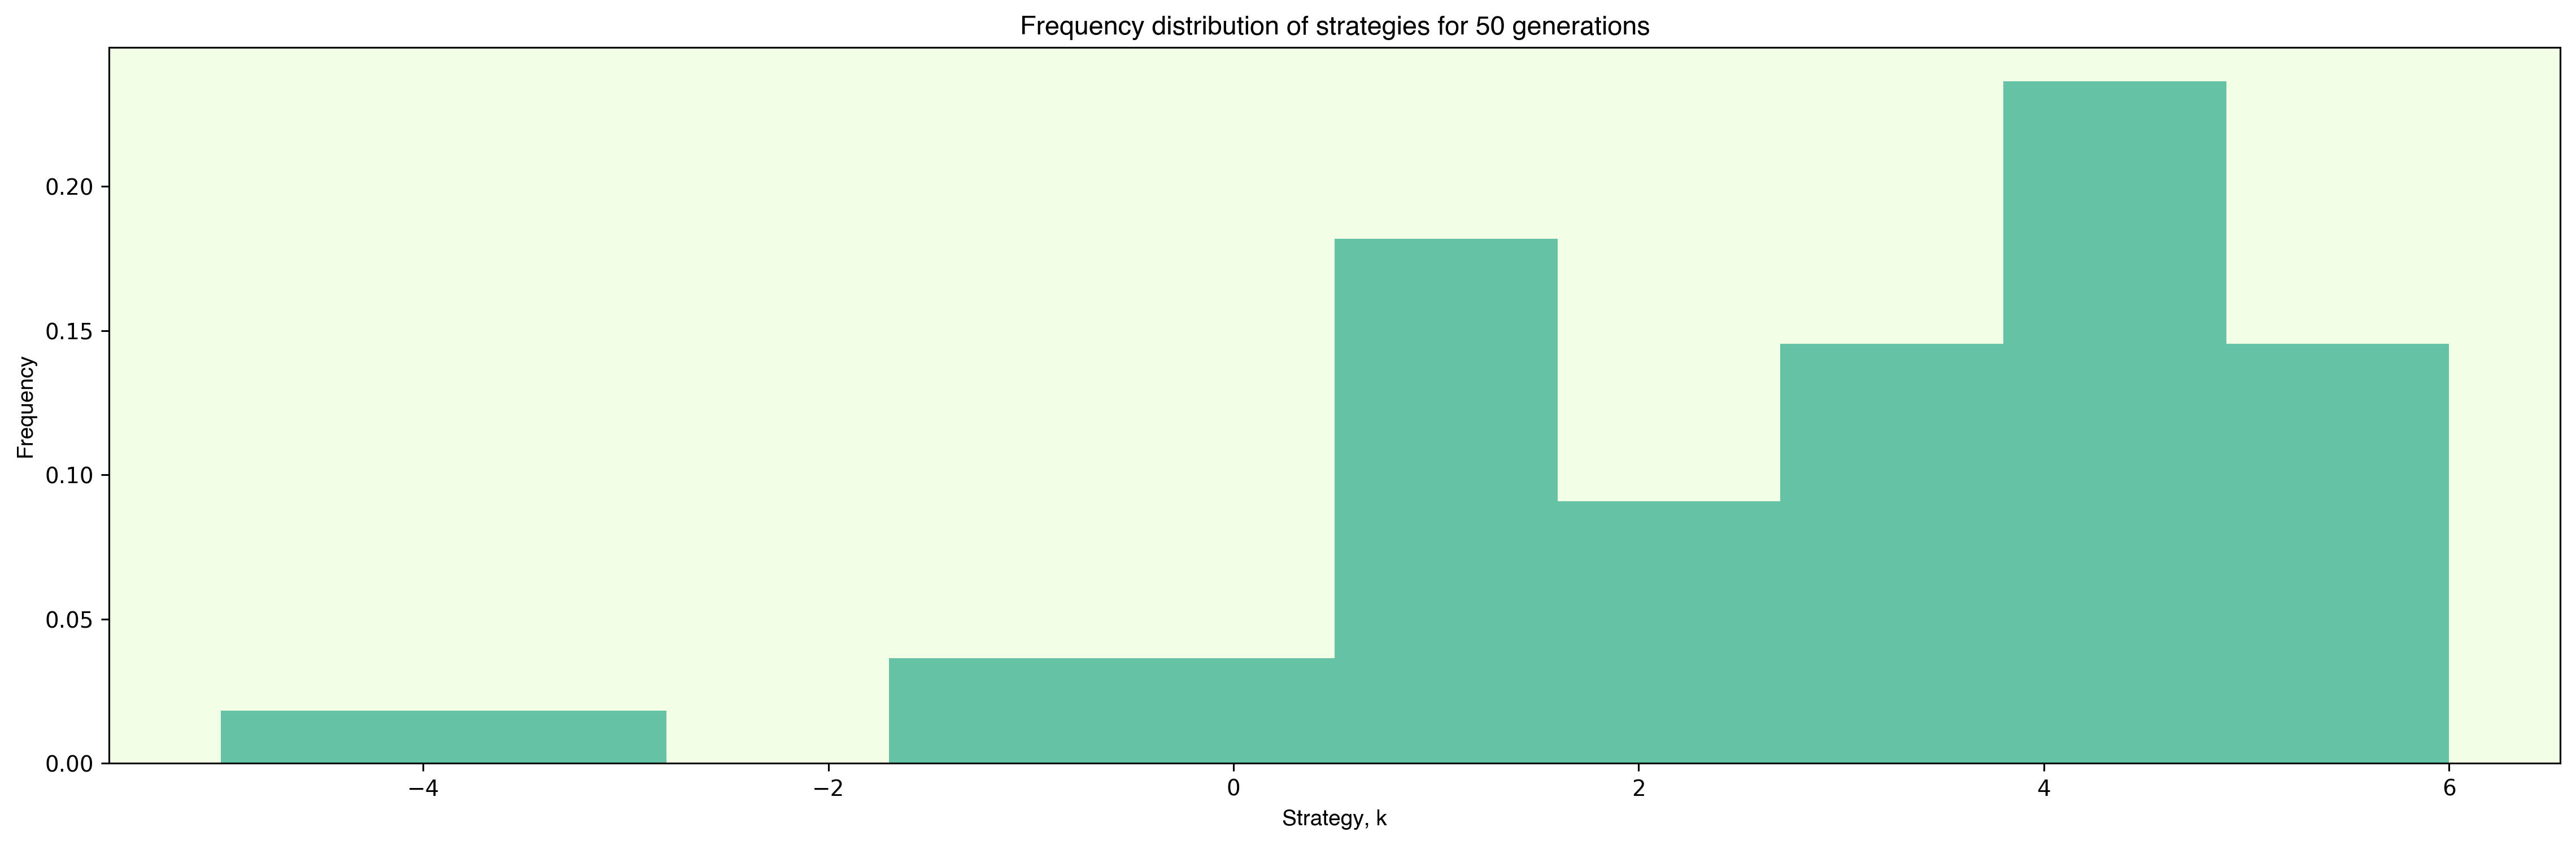

In [58]:
strategies = []
for i in range(50):
    values = play_round(m=100, iterations= 200)
    for value in values:
        strategies.append(value)
    

    
figure(figsize=(20, 6), dpi=280)

plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('Frequency distribution of strategies for {} generations'.format(50),fontname='Helvetica')
plt.hist( np.array(strategies), color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()

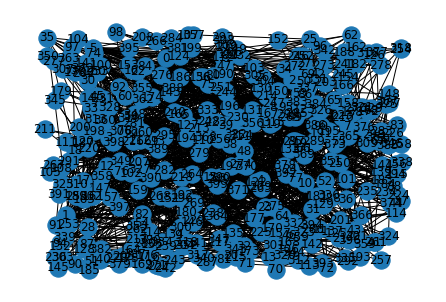

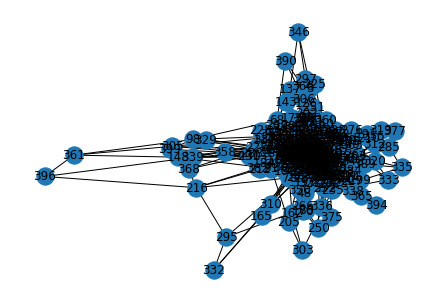

<Figure size 432x288 with 0 Axes>

In [20]:
g = nx.barabasi_albert_graph(N, 3)


 
# drawing in random layout
nx.draw_random(g, with_labels = True)
plt.show()
 
# clearing the current plot
plt.clf()
 
# drawing in spring layout
pos = nx.drawing.layout.spectral_layout(g, scale=5, dim = 2)
nx.draw(g,pos=pos, with_labels = True)
plt.show()
 
# clearing the current plot
plt.clf()
 